**Author: Gaetano Antonicchio**


# --------------------------------------------
# Extract Time Series from .mp3 data
# --------------------------------------------

In [ ]:
%matplotlib inline

import os,sys,inspect
PATH = '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2'
sys.path.insert(0, PATH)

import pandas as pd
import numpy as np
from fma_metadata import utils
import matplotlib.pyplot as plt

### Load FMA datasets

In [2]:
# load datasets
tracks_df = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv')
echo = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv')
features = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/features.csv')

##  (TIME SERIES DATASET  [Temporal_features ]

In [4]:
# creating ts1 dataset
genres = tracks_df['track'][['genre_top']]
temp_feat = echo['echonest', 'temporal_features']
temp_feat = temp_feat.merge(genres, on='track_id')
temp_feat.dropna(inplace=True)
temp_feat.head()

,000,001,002,003,004,005,006,007,008,009,...,215,216,217,218,219,220,221,222,223,genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.877233,0.588911,0.354243,0.295090,0.298413,0.309430,0.304496,0.334579,0.249495,0.259656,...,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749,Hip-Hop
3,0.534429,0.537414,0.443299,0.390879,0.344573,0.366448,0.419455,0.747766,0.460901,0.392379,...,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085,Hip-Hop
5,0.548093,0.720192,0.389257,0.344934,0.361300,0.402543,0.434044,0.388137,0.512487,0.525755,...,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737,Hip-Hop
10,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,...,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809,Pop
134,0.610849,0.569169,0.428494,0.345796,0.376920,0.460590,0.401371,0.449900,0.428946,0.446736,...,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705,Hip-Hop


#### TS of 1 Rock and 1 Classical

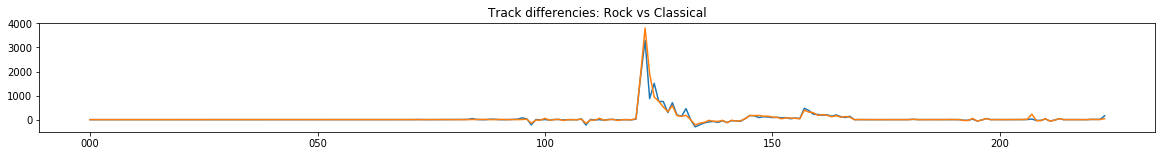

In [36]:
plt.figure(figsize=(20,2))
plt.title("Track differencies: Rock vs Classical")
temp_feat[temp_feat['genre_top']=='Rock'].iloc[1,:224].plot()
temp_feat[temp_feat['genre_top']=='Classical'].iloc[1,:224].plot()

#### Same genre: Hip-Hop first 2 tracks


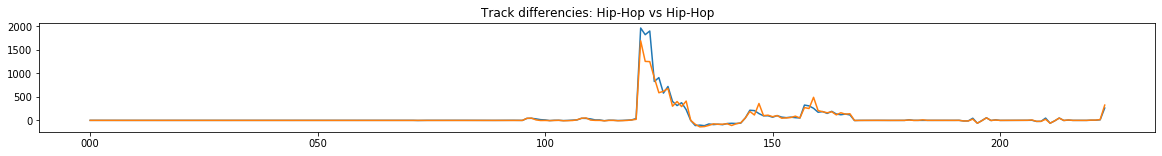

In [38]:
plt.figure(figsize=(20,2))
plt.title("Track differencies: Hip-Hop vs Hip-Hop")
temp_feat.iloc[0,:224].plot()
temp_feat.iloc[1,:224].plot()

#### Same genre:  2 Rock tracks

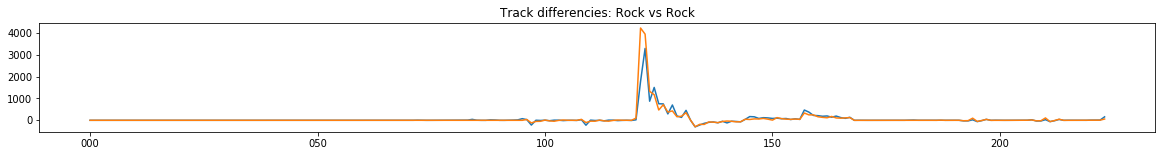

In [39]:
plt.figure(figsize=(20,2))
plt.title("Track differencies: Rock vs Rock")
temp_feat[temp_feat['genre_top']=='Rock'].iloc[1,:224].plot()
temp_feat[temp_feat['genre_top']=='Rock'].iloc[3,:224].plot()

Temporal Features do not appear to be time series.<br>
All tracks have the same patterns which is strange. 

## Extract TS from mp3 songs

In [8]:
import librosa
from os import listdir
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# path folder with .mp3 data
path = '/Volumes/Untitled/fma_small'                  

list_ts = []  #list where ts will be temporarly stored
track_ids = [] #list of ts indexes 

for folder in listdir(path):
    if folder != ".DS_Store" and folder != 'checksums' and folder !='README.txt':       # ignores irrelevant files
        for track_num in tqdm(listdir( path +'/'+ folder)):
            track_id = track_num.replace('.mp3', '').lstrip('0') 
            track_path = path +'/'+ folder +'/' + track_num                   
            # extract TS
            ts, sr = librosa.load(track_path, sr=220)                                   # ts: Time Series, 
                                                                                        # sr: Sampling Rate
            
            #append time-series and track_id
            list_ts.append(ts)
            track_ids.append(track_id)      

100%|██████████| 27/27 [00:35<00:00,  1.33s/it]


In [9]:
# create dataframe
ts_df = pd.DataFrame(data=list_ts, index=track_ids)

#--------------------------------------- Pre-processing ----------------------------------------------#

# rename index to "track_id"
ts_df.index.names = ['track_id']
# remove NaN values - some tracks are few sec longer --> I set all tracks to equal length 3597
ts_df.dropna(axis=1, inplace=True)
# temporarly reset index
ts_df.reset_index(inplace=True)
# change type index from object to int
ts_df['track_id'] = ts_df['track_id'].astype(int)
# set track_id as index
ts_df.set_index('track_id', inplace=True)
# change columns type from object to float
columns = ts_df.columns
for col in columns:
    ts_df[col] = ts_df[col].astype(float)
    
#-----------------------------------------------------------------------------------------------------#

ts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.000021,0.000079,-0.000097,0.000015,0.000067,0.000180,-0.000014,-0.002337,-0.003301,-0.000682,...,-0.006333,0.024173,0.008467,-0.016196,0.029876,-0.018105,-0.008085,0.034457,-0.050515,0.021824
5,-0.003249,0.006941,-0.005851,-0.001030,0.011440,-0.000990,-0.013827,0.001752,0.066035,0.052959,...,-0.002453,-0.005119,0.013981,0.011218,0.006162,0.024548,0.017781,-0.000509,0.005008,0.004632
10,0.001239,0.000863,-0.002858,0.003003,-0.000325,-0.001892,0.004202,-0.001749,-0.001617,0.000412,...,0.132318,-0.088844,-0.032341,0.218495,-0.270919,-0.180430,0.513954,0.012256,-0.502670,0.079096
140,0.000327,-0.000493,0.000368,0.000039,-0.000529,0.000814,-0.000658,0.000013,0.000928,-0.001887,...,-0.004134,0.005400,0.021017,-0.011239,-0.013596,0.015188,-0.004299,-0.022615,0.003367,0.011678
141,-0.000213,0.000142,0.000050,-0.000258,0.000337,-0.000192,-0.000140,0.000481,-0.000560,0.000151,...,-0.002287,0.001271,0.001856,-0.001925,-0.000716,0.001852,-0.001828,-0.001627,0.003889,0.000540


In [19]:
# Dataset info
print(f"___Partition SMALL___\nNumber of time series (tracks):{ts_df.shape[0]}\nLength of time series(columns): {ts_df.shape[1]}")

___Partition SMALL___
Number of time series (tracks):4021
Length of time series(columns): 3598


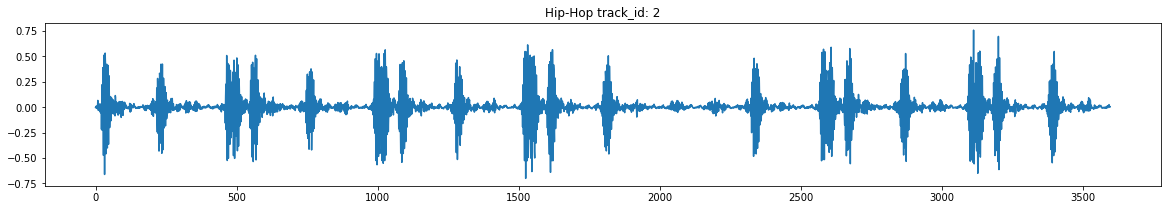

In [31]:
# test correctness: 1 hip-hop song in the dataset --> track_id: 2 
plt.figure(figsize=(20,3))
plt.title("Hip-Hop track_id: 2")
ts_df.iloc[1,:].plot()

In [11]:
# save dataset
'''with open('ts_dataset.csv', mode='w') as dataset:
    dataset.write(ts_df.to_csv())'''

##### Now it is possible to attach the genre labels or any other labels to the time series dataset through the "track_id".

In [464]:
genres = tracks_df['track'][['genre_top']]
genres = genres.reset_index()

##### Extract time stamps from time series

-0.00019232498190376645 0.00023504678412336944 0.14088417800731345 0.08856447279025327


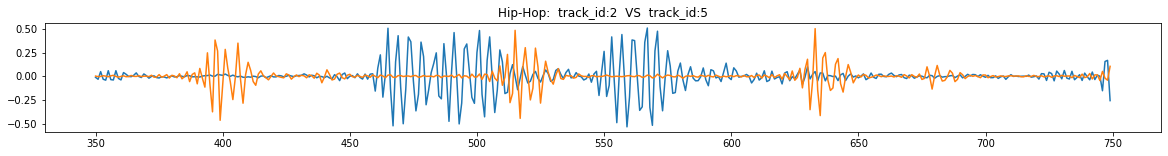

In [34]:
offset = 350
win = 400
ts1 = ts_df.iloc[1, offset:(offset+win)]
ts2 = ts_df.iloc[2, offset:(offset+win)]

# Amplitude Scaling
#ts1 = (ts - ts.mean()) / ts.std()
#ts2 = (ts2 - ts2.mean()) / ts2.std()

plt.figure(figsize=(20,2))
plt.title('Hip-Hop:  track_id:2  VS  track_id:5')
plt.plot(ts1)
plt.plot(ts2)
print(ts1.mean(), ts2.mean(), ts1.std(), ts2.std())